In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/GTSRB"

In [ ]:
%cd drive/MyDrive/GTSRB

/content/drive/MyDrive/GTSRB


In [ ]:
pwd

'/content'

In [ ]:
import pandas as pd
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#1. EDA

In [ ]:
cd drive/MyDriveMyDrive/GTSRB

[Errno 2] No such file or directory: 'drive/MyDriveMyDrive/GTSRB'
/content


In [ ]:
data_dir = '/content/drive/MyDrive/GTSRB'
test_dir = '/content/drive/MyDrive/GTSRB/Test'
train_dir = '/content/drive/MyDrive/GTSRB/Train'

In [ ]:
train = pd.read_csv(os.path.join(data_dir, './Train.csv'))
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
test =  pd.read_csv(os.path.join(data_dir, './Test.csv'))
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
col1 = np.unique(train['ClassId'])[:21]
col2 = np.bincount(train['ClassId'])[:21]
col4 = np.bincount(test['ClassId'])[:21]

col5 = np.unique(train['ClassId'])[21:]
col6 = np.bincount(train['ClassId'])[21:]
col8 = np.bincount(test['ClassId'])[21:]

df_count = pd.DataFrame({"ClassId ": col1, 'Train ': col2, 'Test ': col4})
df_count.loc[22] = [' ', ' ', ' ']
df_count["ClassId"] = col5
df_count['Train'] = col6
df_count['Test'] = col8

In [ ]:
df_count

,ClassId,Train,Test,ClassId,Train,Test
0,0,210,60,21,330,90
1,1,2220,720,22,390,120
2,2,2250,750,23,510,150
3,3,1410,450,24,270,90
4,4,1980,660,25,1500,480
5,5,1860,630,26,600,180
6,6,420,150,27,240,60
7,7,1440,450,28,540,150
8,8,1410,450,29,270,90
9,9,1470,480,30,450,150


In [ ]:
NUM_CATEGORIES = len(os.listdir(train_dir))
IMG_HEIGHT = 32
IMG_WIDTH = 32

FileNotFoundError: ignored

In [ ]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

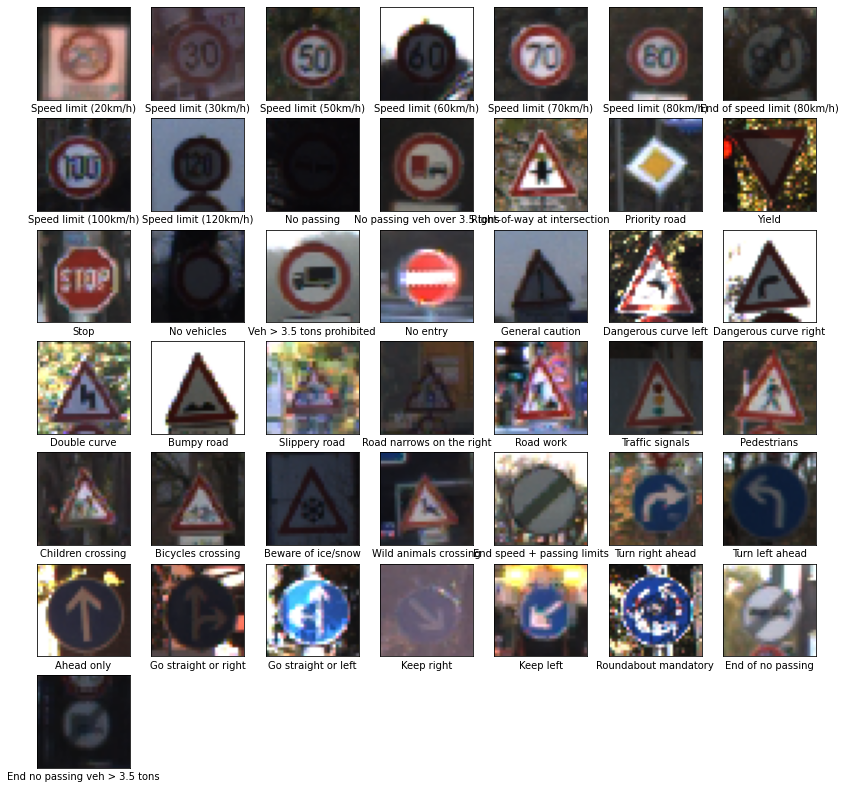

In [ ]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_dir)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
    plt.xlabel(classes[i+1], fontsize=10)
plt.show()

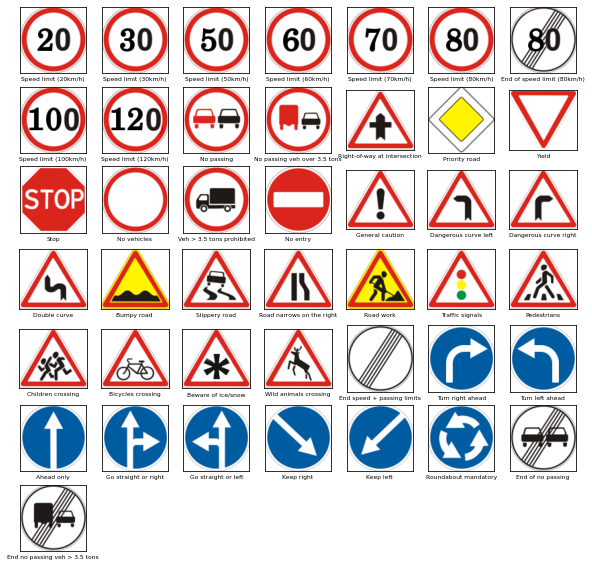

In [ ]:
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = data_dir + "/Meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i+1], fontsize=6)

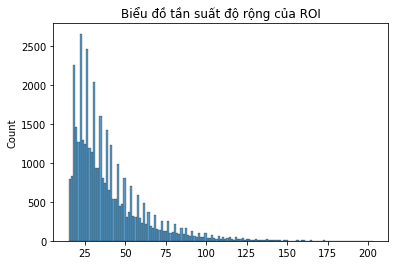

In [ ]:
sns.histplot(train.values[:, -4] - train.values[:, 2])
plt.title('Biểu đồ tần suất độ rộng của ROI')
plt.show()

In [ ]:
print('Độ rộng TB của ROI')
np.mean(train.values[:, -4] - train.values[:, 2])

Độ rộng TB của ROI


39.197786222550945

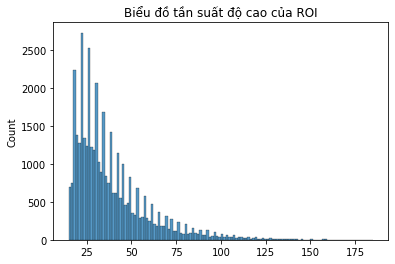

In [ ]:
sns.histplot(train.values[:, -3] - train.values[:, 3])
plt.title('Biểu đồ tần suất độ cao của ROI')
plt.show()

In [ ]:
print('Độ cao TB của ROI')
np.mean(train.values[:, -3] - train.values[:, 3])

Độ cao TB của ROI


38.76599760259124

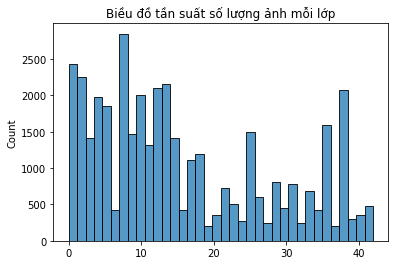

In [ ]:
classId = train.values[:, 6].astype('int')
sns.histplot(classId)
plt.title('Biều đồ tần suất số lượng ảnh mỗi lớp')
plt.show()

Các lớp có sự phân bố không đồng đều về dữ liệu

In [ ]:
print('Lớp có ít biển nhất là', classes[np.argmin(np.bincount(classId)) + 1])
print('Số lượng là', np.min(np.bincount(classId)))

Lớp có ít biển nhất là Speed limit (20km/h)
Số lượng là 210


In [ ]:
print('Lớp có nhiều biển nhất là', classes[np.argmax(np.bincount(classId)) + 1])
print('Số lượng là', np.max(np.bincount(classId)))

Lớp có nhiều biển nhất là Speed limit (50km/h)
Số lượng là 2250


#2. Image Preprocessing


*   Extract ROI
*   Resize  
Vì độ cao và độ rộng TB của ROI là 38, 39 nên resize image về kích thước (32,32,3)
* Normalize
* CLAHE
* Non-local means để denoise



In [ ]:
import cv2 as cv
from skimage import exposure

In [ ]:
def normalize(image):
  image = image.astype('float')
  return image/255

In [ ]:
processed_dir = '/content/drive/MyDrive/GTSRB/Processed/Test'

In [ ]:
for i in range(43):
  os.rmdir(os.path.join(processed_dir, str(i)))

In [ ]:
ind = np.where(train['ClassId'] == 10)[0][0]
ind

15030

In [ ]:
images = np.load('/content/drive/MyDrive/GTSRB/Original/trainImages.npy', allow_pickle=True)
image = cv.cvtColor(images[ind], cv.COLOR_BGR2RGB)

In [ ]:
denoise_img = cv.fastNlMeansDenoisingColored(image,3,3,5,5)
clahe_img = exposure.equalize_adapthist(image, clip_limit=0.1)

In [ ]:
image.shape

(37, 37, 3)

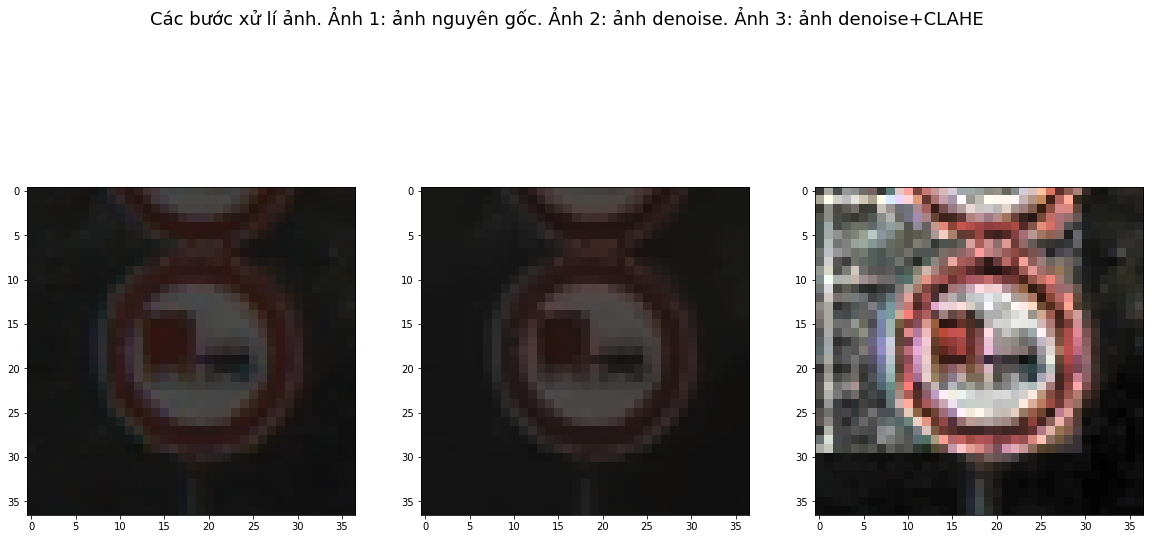

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,10))
plt.suptitle('Các bước xử lí ảnh. Ảnh 1: ảnh nguyên gốc. Ảnh 2: ảnh denoise. Ảnh 3: ảnh denoise+CLAHE', fontsize=18)
ax[0].imshow(image)
ax[1].imshow(denoise_img)
ax[2].imshow(clahe_img)

plt.show()

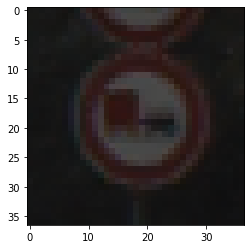

In [ ]:
plt.imshow(cv.cvtColor(images[ind], cv.COLOR_BGR2RGB))

In [ ]:
def save_image(data, data_dir, processed_dir):
  test_data = np.empty((len(data), 32, 32, 3))
  for row in data.iterrows():
    print('Processed image', row[0])
    w = row[1].Width 
    h = row[1].Height
    roix1 = row[1]['Roi.X1']
    roix2 = row[1]['Roi.X2']
    roiy1 = row[1]['Roi.Y1']
    roiy2 = row[1]['Roi.Y2']
    image_path = row[1]['Path']
    classId = row[1]['ClassId']

    image = cv.imread(os.path.join(data_dir, image_path))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Extract ROI
    image = image[roix1:roix2, roiy1:roiy2]

    # Resize 
    image = cv.resize(image, (IMG_WIDTH, IMG_HEIGHT))

    # Denoise
    processed_img = cv.fastNlMeansDenoisingColored(image,3,3,5,5)

    # CLAHE
    processed_img = exposure.equalize_adapthist(processed_img, clip_limit=0.1)
    test_data[row[0],:] = processed_img 
    # Normalize
    # processed_img = normalize(processed_img)
    
  # Save image
  #im_name = image_path.split('/')[-1][:-3] + 'npy'
  #dir_path = os.path.join(processed_dir, 'test_data.npy')
  #np.save(dir_path, test_data)
  return


In [ ]:
save_image(test, data_dir, processed_dir)

Streaming output truncated to the last 5000 lines.
Processed image 7630
Processed image 7631
Processed image 7632
Processed image 7633
Processed image 7634
Processed image 7635
Processed image 7636
Processed image 7637
Processed image 7638
Processed image 7639
Processed image 7640
Processed image 7641
Processed image 7642
Processed image 7643
Processed image 7644
Processed image 7645
Processed image 7646
Processed image 7647
Processed image 7648
Processed image 7649
Processed image 7650
Processed image 7651
Processed image 7652
Processed image 7653
Processed image 7654
Processed image 7655
Processed image 7656
Processed image 7657
Processed image 7658
Processed image 7659
Processed image 7660
Processed image 7661
Processed image 7662
Processed image 7663
Processed image 7664
Processed image 7665
Processed image 7666
Processed image 7667
Processed image 7668
Processed image 7669
Processed image 7670
Processed image 7671
Processed image 7672
Processed image 7673
Processed image 7674
Proc

In [ ]:
def load_image(train_data, data_dir):
  data = []
  labels = []
  for row in train_data.iterrows():
    if row[0] % 1000 == 0:
      print('Load image', row[0])
    image_path = row[1]['Path']

    image = cv.imread(os.path.join(data_dir, image_path))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    data.append(processed_img.flatten())
    labels.append(classId)

  return data, labels


In [ ]:
processed_train = '/content/gdrive/MyDrive/GTSRB/Processed'
data, labels = load_image(train, processed_train)

In [ ]:
pwd

'/content/drive/My Drive/GTSRB/Processed/Train/20'

In [ ]:
cd ../

/content/drive/My Drive/GTSRB/Processed/Train


In [ ]:
ls

In [ ]:
ls

00020_00000_00000.npy  00020_00000_00004.npy  00020_00000_00008.npy
00020_00000_00001.npy  00020_00000_00005.npy  00020_00000_00009.npy
00020_00000_00002.npy  00020_00000_00006.npy
00020_00000_00003.npy  00020_00000_00007.npy
